# Hadcrut - Spectral analysis 


This Notebook is an attempt to reproduce the **Figure 1** of the paper [Extending the Range of Milankovic Cycles and Resulting Global Temperature Variations to Shorter Periods (1–100 Year Range) ](https://doi.org/10.3390/geosciences12120448) as shown below :

![foo](./data/figure1.png)

In [5]:
# Imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import pi as π

# Load data


We load Hadcrut5 data and add a couple of other time series (sinus and linear trend) for validation and comparaison

In [43]:
# Read Hadcrut 5 data (monhtly)
df = pd.read_csv("data/hadcrut5.csv", parse_dates=["Time"]).set_index("Time")

hadcrut5 = df["Anomaly (deg C)"]

time = df.index

# Time in years
duration = (time[-1] - time[0]).days / 365.25
years = np.linspace(0, duration, len(hadcrut5))

# Build dataframe, adding sinus and linear rise for validation / comparison
df = pd.DataFrame(dict(
    hadcrut5=hadcrut5.values,
    sin15=np.sin(2*π*years/15),
    sin70=np.sin(2*π*years/70),
    linear = -1 + 2 * (years/duration),
    years=years),
    index=time)

We plot raw data

<AxesSubplot:xlabel='Time'>

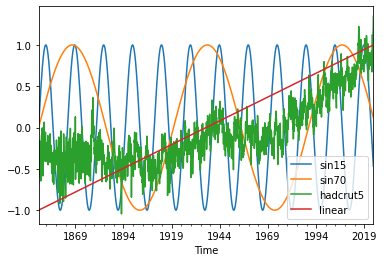

In [44]:
df[["sin15", "sin70", "hadcrut5", "linear"]].plot()

# Fourier transform

We perform fourier transform of data and plot it along frequencies and period, as done in the paper (quite unusual to say the least)

In [50]:
def plot_fourier(df, col) :
    data = df[col].values
    
    # Normalized fourier transform
    fourier = np.abs(np.fft.rfft(data))/len(data)*2
    
    # Frequencies (in year^-1) 
    freqs = np.arange(len(fourier)) / np.max(df.years)
    
    # Periods, in year
    periods = 1 / freqs
    
    fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(15, 8))
    fig.subplots_adjust(hspace=0.8)

    
    Y_LABEL = "temp anomaly (°C)"
    
    ax0.plot(
        df[col], 
        color="orange",
        label=col)
    ax0.legend()
    ax0.set_ylabel(Y_LABEL)
    
    ax1.plot(
        freqs, fourier, 
        color="green",
        label="Fourier transform of '%s'" % col)
    
    ax1.set_xlabel("frequency [year^-1]")
    ax1.legend()
    ax1.set_ylabel(Y_LABEL)
    
    # Zoomed fourier transform
    ax2.plot(
        freqs, fourier, 
        color="green",
        label="Fourier transform of '%s' - Zoomed" % col)
    
    ax2.scatter(
        freqs[1:4], fourier[1:4], 
        marker="+", color="red")
    for i in range(1, 4):
        ax2.annotate("F%d"%i, (freqs[i]+0.02, fourier[i]))
        
    ax2.set_xlabel("frequency [year^-1] [Zoomed]")
    ax2.set_xlim([0, 0.5])
    ax2.legend()
    ax2.set_ylabel(Y_LABEL)
    
    # Fourier over period
    ax3.plot(
        periods, fourier,
        label="Fourier transform of '%s' - by period" % col)
    ax3.scatter(
        periods, fourier, 
        marker="+", color="red")
    ax3.set_xlabel("period (1/frequency) [years]")
    
    for i in range(1, 4):
        ax3.annotate("F%d"%i, (periods[i]+2, fourier[i]+0.01))
    
    ax3.legend()
    ax3.set_ylabel(Y_LABEL)
    
    

    fig.tight_layout()

## Fourier transform of hadcrut 5

/tmp/ipykernel_131903/2745922717.py:11: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / freqs


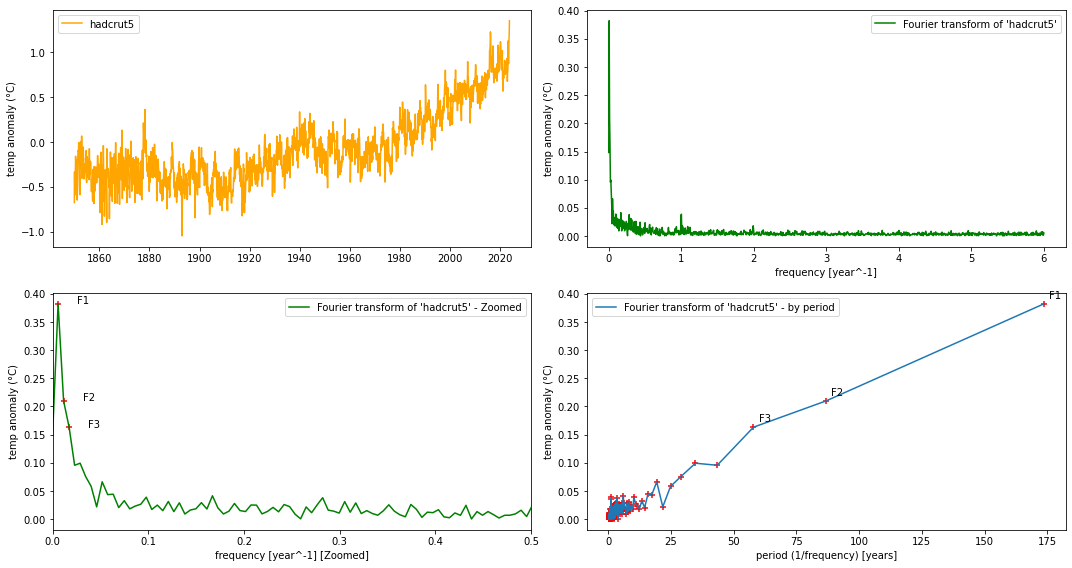

In [51]:
plot_fourier(df, "hadcrut5")

The graph on the bottom-right shows the fourier transform, along periods, as in **Figure 1**.

It does not look at all like **Figure 1** :

* The graph is not smooth like figure 1: *Fourier transforms* only applies to whole frequencies. Hence, when displayed by period, there can only be data points on *harmonics on the full time range* (175 years here). The smoothing of Figure 1 of the paper looks like an arbitrary interpolation applied this raw data, not detailed in the paper.

* Our graph does not show any particular high point for F2 (175 years / 2 = 87.5 years) like in **Figure 1**. It is actually pretty close to the Fourier transform of a **linear trend** (see below). 


In any case, a high point at such a low frequency (= period of same order of magnitude than the full span of data), could not possibly be interpreted as the proof of any "periodic" feature of the signal. It is merely an artefact of the fourier transform of non peridic series on a limited range : F1 and F2 are the main harmonics of the periods, they will stand out for any non periodic signal (like **linear trend** as shown below).

A phenomena of period of 80 years only happens twice over 160 years. It is scientifically absurd to expect to prove a periodicity on the basis of two occurrences. It's the spectral analysis equivalent of a linear interpolation over 2 points.


## Fourier transform of a linear trend

/tmp/ipykernel_131903/2745922717.py:11: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / freqs


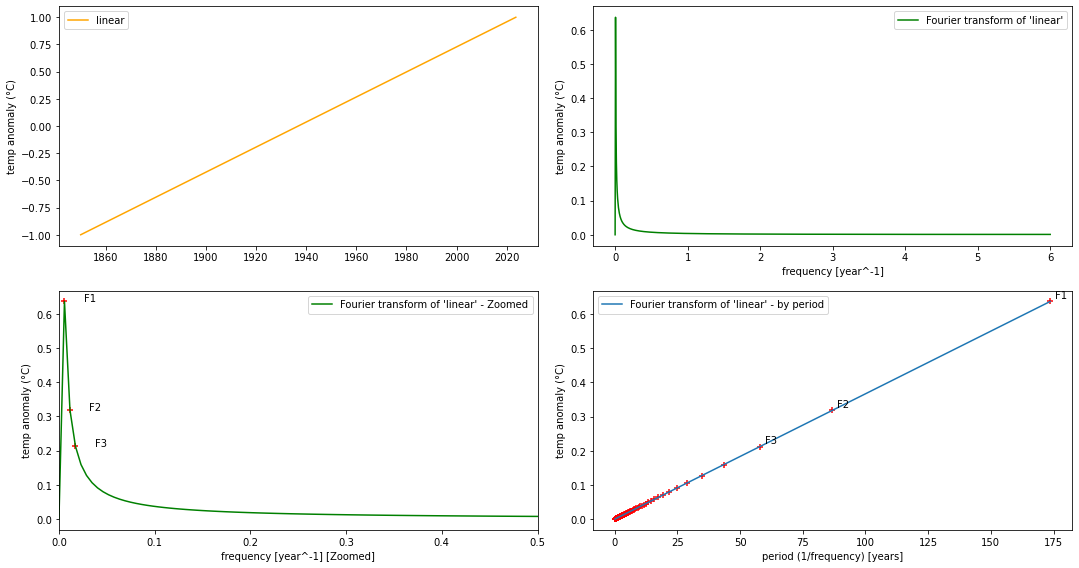

In [52]:
plot_fourier(df, "linear")

The same method applied to a simple linear trend shows a similar pattern than Hardcrut5 : Low frequencies show higher values. Yet, this cannot possibly be interpreted as a "periodic" features over 175 years or 87.5 years.


# Fourier transform over simple sinuses 

For reference, we also show the same method applied to pure sinus :

## Sinus over 15 years

A perodic signal over 15 years is short enough compared to the total time span (175 years) to correctly be captured by Fourier transform, with proper amplitude and frequency. 

For short periods, high values of the fourier transform can demontrate the presence of periodic features.

/tmp/ipykernel_131903/2821361856.py:11: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / freqs


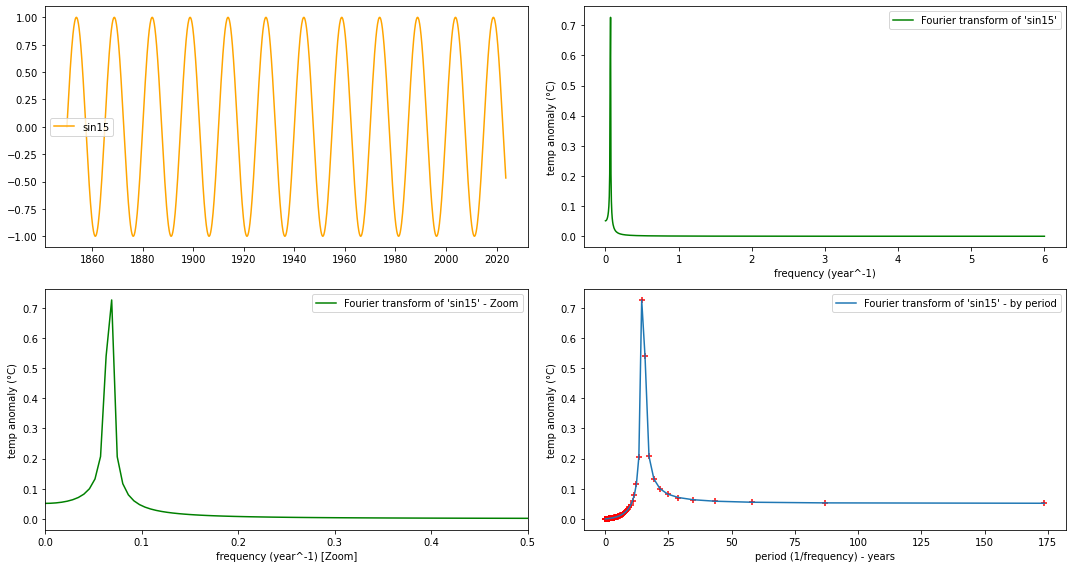

In [27]:
plot_fourier(df, "sin15")

## Sinus over 70 years

A pure sinus with a period of 70 years cannot properly be captured by Fourier transform. 70 years is not a whole divider of the full period and thus is spread over the surrounding harmonics (F2=87 years & F3 = 58 years). 

This demonstrates that Fourier transform (or any spectrum analysis) cannot capture well a periodic signal whose period is the same order of magnitude than the full range of the signal.

/tmp/ipykernel_131903/2994373885.py:11: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / freqs


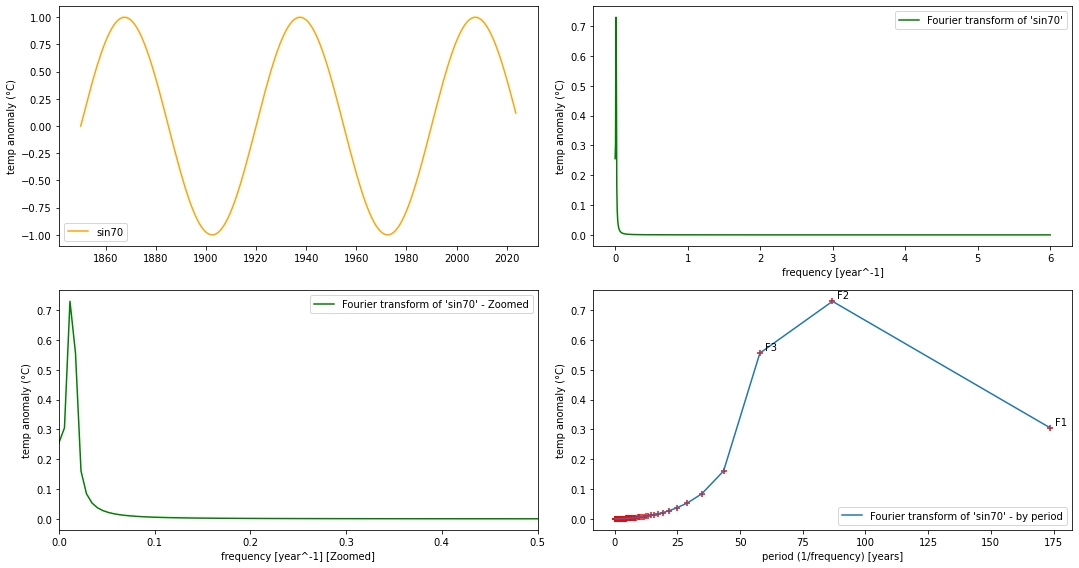

In [47]:
plot_fourier(df, "sin70")